In [37]:
#定稿
import itertools
import numpy as np
import matplotlib.pyplot as plt
# test data
irisA = []
irisB = []
irisC = []

# Read input file
def readfile():
    data = []
    labels = []
    lines = open("d:\iris.txt")
    for line in lines:
        parts = line.split()
        row = [float(x) for x in parts[:-1]] 
        label = int(parts[-1]) 
        data.append(row)
        labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    with open('d:\iris.txt') as f:
        for line in f:
            line = line.strip().replace('  ', ' ').split(' ')
            iris_type = line[-1]
            iris_data = [ float(num) for num in line[:-1] ] + [ line[-1] ]
            if iris_type == '1':
                irisA.append(iris_data)
            elif iris_type == '2':
                irisB.append(iris_data)
            elif iris_type == '3':
                irisC.append(iris_data)
        
    feature_names = ['Sepal Length', 'Sepal Width', "Petal Length", "Petal Width"]

# Generate all the combinations C(4,2)=6 plots
    feature_indices = range(4)
    combinations = list(itertools.combinations(feature_indices, 2))

# Generate plots
    for feature1_idx, feature2_idx in combinations:
        feature1_values = [point[feature1_idx] for point in data]
        feature2_values = [point[feature2_idx] for point in data]
        labels = [point[-1] for point in data] 

        plt.figure()
        plt.scatter(feature1_values, feature2_values, c=labels, cmap='viridis')
        plt.xlabel(feature_names[feature1_idx])
        plt.ylabel(feature_names[feature2_idx])
        plt.title(f'Feature Combination: ({feature_names[feature1_idx]}, {feature_names[feature2_idx]})')
    
    plt.show()
    
# For sorting
def sortfunc(e):
    return e[0]

# Will return correct rate
def KNN(train, test, features, K):
    wrong = 0
    correct = 0
    total = 0
    for t in test:
        # Calculate distance
        dist = []
        # Training data
        for tr in train:
            d = 0
            for f in features:
                d += (tr[f] - t[f]) ** 2
            # Save distance & type
            dist.append((d, tr[-1]))
        #print(dist)
        dist.sort(key=sortfunc)
        #dist = np.array(dist)
       # print(dist.shape)
        neighbor = {'1': 0, '2': 0, '3': 0}
        for i in range(0, K):
            neighbor[dist[i][1]] += 1

        max_value = max(neighbor, key=neighbor.get)
        if max_value == t[-1]:
            correct += 1
        else:
            wrong += 1
        total += 1
    return float(correct) / float(total)

def main():
    kvalue = [1,3]
    readfile()
    set1 = irisA[:25] + irisB[:25] + irisC[:25]
    set2 = irisA[25:] + irisB[25:] + irisC[25:]
    features = [0, 1, 2, 3]
    for k in kvalue:
        print("knn k="+str(k))
        for i in range(1, 5):
            feats = itertools.combinations(features, i)
            for feat in feats:
                print(feat)
                print("%.2f%%" % (100 * ( KNN(set1, set2, feat, k) + KNN(set2, set1, feat, k) ) / 2.0))
from itertools import combinations
if __name__ == "__main__":
    main()


NameError: name 'feature1_idx' is not defined

<Figure size 432x288 with 0 Axes>

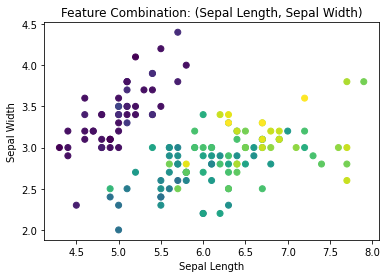

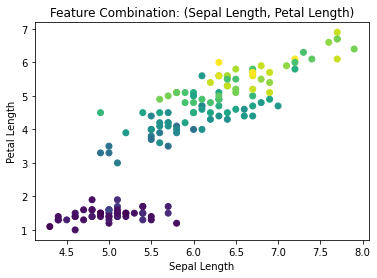

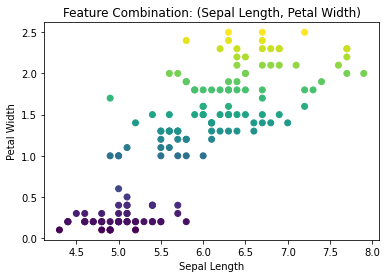

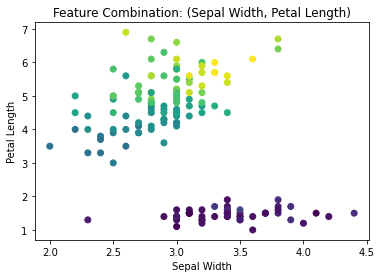

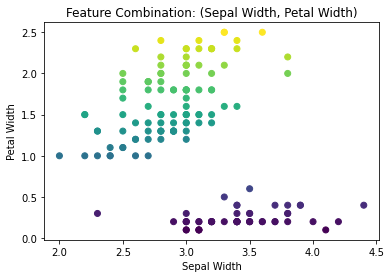

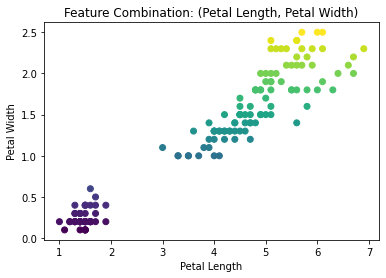

(0,)
63.78%
(1,)
49.33%
(2,)
91.78%
(3,)
89.56%
(0, 1)
85.78%
(0, 2)
96.44%
(0, 3)
95.33%
(1, 2)
97.11%
(1, 3)
96.44%
(2, 3)
97.78%
(0, 1, 2)
97.33%
(0, 1, 3)
97.78%
(0, 2, 3)
98.67%
(1, 2, 3)
98.22%
(0, 1, 2, 3)
98.22%


In [44]:
def main():
    kvalue = [1,3]
    readfile()
    set1 = irisA[:25] + irisB[:25] + irisC[:25]
    set2 = irisA[25:] + irisB[25:] + irisC[25:]
    features = [0, 1, 2, 3]
    k=3
    for i in range(1, 5):
        feats = itertools.combinations(features, i)
        for feat in feats:
            print(feat)
            print("%.2f%%" % (100 * ( KNN(set1, set2, feat, 1) + KNN(set2, set1, feat, 1) ) / 2.0))

if __name__ == "__main__":
    main()


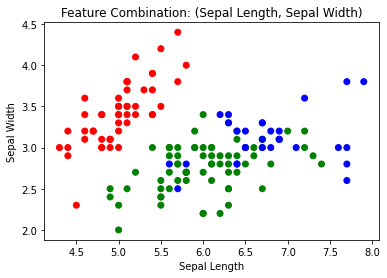

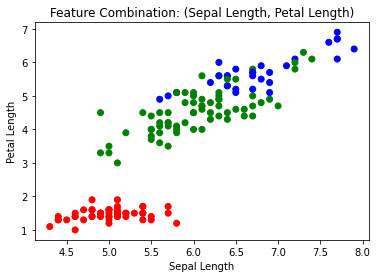

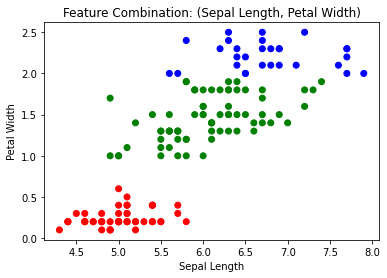

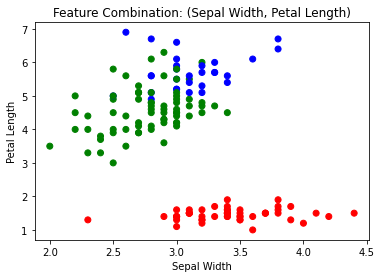

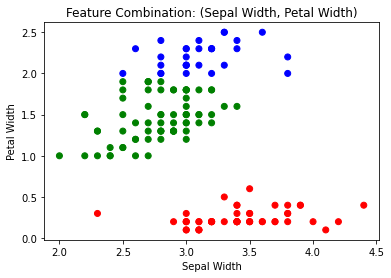

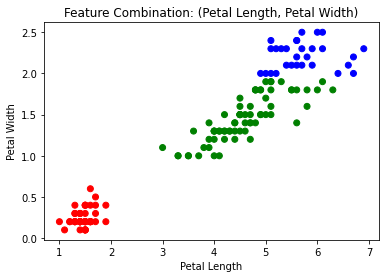

knn k=1
(0,)
59.33%
(1,)
48.67%
(2,)
91.33%
(3,)
91.33%
(0, 1)
70.67%
(0, 2)
92.67%
(0, 3)
88.67%
(1, 2)
92.00%
(1, 3)
93.33%
(2, 3)
95.33%
(0, 1, 2)
92.67%
(0, 1, 3)
92.67%
(0, 2, 3)
94.67%
(1, 2, 3)
96.67%
(0, 1, 2, 3)
94.67%
knn k=3
(0,)
61.33%
(1,)
52.00%
(2,)
92.67%
(3,)
96.00%
(0, 1)
75.33%
(0, 2)
92.67%
(0, 3)
94.00%
(1, 2)
92.00%
(1, 3)
95.33%
(2, 3)
95.33%
(0, 1, 2)
92.67%
(0, 1, 3)
90.67%
(0, 2, 3)
95.33%
(1, 2, 3)
97.33%
(0, 1, 2, 3)
94.00%


In [40]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# test data
irisA = []
irisB = []
irisC = []

# Read input file
def readfile():
    data = []
    labels = []
    lines = open("d:\iris.txt")
    for line in lines:
        parts = line.split()
        row = [float(x) for x in parts[:-1]] 
        label = int(parts[-1]) 
        data.append(row)
        labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    with open('d:\iris.txt') as f:
        for line in f:
            line = line.strip().replace('  ', ' ').split(' ')
            iris_type = line[-1]
            iris_data = [ float(num) for num in line[:-1] ] + [ line[-1] ]
            if iris_type == '1':
                irisA.append(iris_data)
            elif iris_type == '2':
                irisB.append(iris_data)
            elif iris_type == '3':
                irisC.append(iris_data)
        
    feature_names = ['Sepal Length', 'Sepal Width', "Petal Length", "Petal Width"]

    # Generate all the combinations C(4,2)=6 plots
    feature_indices = range(4)
    combinations = list(itertools.combinations(feature_indices, 2))

    # Generate a list of colors for each label
    label_colors = {0: 'red', 1: 'green', 2: 'blue'}

    # Generate plots
    for feature1_idx, feature2_idx in combinations:
        feature1_values = [point[feature1_idx] for point in data]
        feature2_values = [point[feature2_idx] for point in data]
        labels = [int(point[-1]) for point in data] 

        plt.figure()
        point_colors = [label_colors[label] for label in labels]

        plt.scatter(feature1_values, feature2_values, c=point_colors)
        plt.xlabel(feature_names[feature1_idx])
        plt.ylabel(feature_names[feature2_idx])
        plt.title(f'Feature Combination: ({feature_names[feature1_idx]}, {feature_names[feature2_idx]})')
    
    plt.show()
    
# For sorting
def sortfunc(e):
    return e[0]

# Will return correct rate
def KNN(train, test, features, K):
    wrong = 0
    correct = 0
    total = 0
    for t in test:
        # Calculate distance
        dist = []
        # Training data
        for tr in train:
            d = 0
            for f in features:
                d += (tr[f] - t[f]) ** 2
            # Save distance & type
            dist.append((d, tr[-1]))
        dist.sort(key=sortfunc)
        neighbor = {'1': 0, '2': 0, '3': 0}
        for i in range(0, K):
            neighbor[dist[i][1]] += 1

        max_value = max(neighbor, key=neighbor.get)
        if max_value == t[-1]:
            correct += 1
        else:
            wrong += 1
        total += 1
    return float(correct) / float(total)

def main():
    kvalue = [1, 3]
    readfile()
    set1 = irisA[:25] + irisB[:25] + irisC[:25]
    set2 = irisA[25:] + irisB[25:] + irisC[25:]
    features = [0, 1, 2, 3]
    for k in kvalue:
        print("knn k=" + str(k))
        for i in range(1, 5):
            feats = itertools.combinations(features, i)
            for feat in feats:
                print(feat)
                print("%.2f%%" % (100 * (KNN(set1, set2, feat, k) + KNN(set2, set1, feat, k)) / 2.0))

if __name__ == "__main__":
    main()


In [34]:
data.shape

(150, 5)

Features 0: 32.00%
Features 1: 32.00%
Features 2: 32.00%
Features 3: 32.00%
Features 0, 1: 32.00%
Features 0, 2: 32.00%
Features 0, 3: 32.00%
Features 1, 2: 32.00%
Features 1, 3: 32.00%
Features 2, 3: 32.00%
Features 0, 1, 2: 32.00%
Features 0, 1, 3: 32.00%
Features 0, 2, 3: 32.00%
Features 1, 2, 3: 32.00%
Features 0, 1, 2, 3: 32.00%
Features 0: 31.33%
Features 1: 31.33%
Features 2: 31.33%
Features 3: 31.33%
Features 0, 1: 31.33%
Features 0, 2: 31.33%
Features 0, 3: 31.33%
Features 1, 2: 31.33%
Features 1, 3: 31.33%
Features 2, 3: 31.33%
Features 0, 1, 2: 31.33%
Features 0, 1, 3: 31.33%
Features 0, 2, 3: 31.33%
Features 1, 2, 3: 31.33%
Features 0, 1, 2, 3: 31.33%


In [13]:
import numpy as np
from qpsolvers import solve_qp
def linear_kernel(x1,x2):
    K =  np.dot(x1,x2)
    return K
def rbf_kernel(x1,x2,sigma):
    dx = np.linalg.norm((x1-x2), ord=2)**2
    K = np.exp(-dx/(2*sigma**2))
    return K
def poly_kernel(x1,x2,n):
    K = np.dot(x1,x2) ** n
    return K

In [14]:
def SVM(trainx, trainy, testx, testy, C, kernel, sig, n):
    P = np.zeros((trainx.shape[0], trainx.shape[0]))
    for i in range(trainx.shape[0]):
        for j in range(trainx.shape[0]):
            if kernel == 'linear':
                P[i, j] = trainy[i] * trainy[j] * linear_kernel(trainx[i], trainx[j])
            elif kernel == 'polynomial':
                P[i, j] = trainy[i] * trainy[j] * poly_kernel(trainx[i], trainx[j], n)
            elif kernel == 'rbf':
                P[i, j] = trainy[i] * trainy[j] * rbf_kernel(trainx[i], trainx[j], sig)

    H = P
    f = -np.ones(trainy.shape)
    Aeq = trainy
    lb = np.zeros(trainx.shape[0])
    ub = C * (np.ones(trainx.shape[0]))
    beq = np.array([0.0])
    alpha = solve_qp(H, f, None, None, Aeq, beq, lb, ub, solver="clarabel")
    
    eps = 2.2204e-16
    print("C = " + str(C))
    print("Kernel is " + kernel)
    for i in range(alpha.size):
        if alpha[i] >= C - np.sqrt(eps):
            alpha[i] = C
            alpha[i] = np.round(alpha[i], 6)
        elif alpha[i] <= 0 + np.sqrt(eps):
            alpha[i] = 0
            alpha[i] = np.round(alpha[i], 6)
        else:
            alpha[i] = np.round(alpha[i], 6)
            print(f"support vector: alpha = {alpha[i]}")
    print("First 5 alpha values:")
    for i in range(5):
        print('{:.4f}'.format(alpha[i]))
    print("alpha sum: " + str(np.sum(alpha)))

    N = 0
    bias = 0
    for k in range(alpha.size):
        if alpha[k] > 0 and alpha[k] < C:
            N += 1
            temp = 0
            for i in range(trainx.shape[0]):
                if alpha[i] > 0 and alpha[i] < C:
                    if kernel == 'linear':
                        temp += alpha[i] * trainy[i] * linear_kernel(trainx[i], trainx[k])
                    elif kernel == 'rbf':
                        temp += alpha[i] * trainy[i] * rbf_kernel(trainx[i], trainx[k], sig)
                    elif kernel == 'polynomial':
                        temp += alpha[i] * trainy[i] * poly_kernel(trainx[i], trainx[k], n)
            bias += 1 / trainy[k] - temp

    if N > 0:
        bias = bias / N

    label = []
    for j in range(testx.shape[0]):
        d = 0
        for i in range(trainx.shape[0]):
            if alpha[i] > 0 and alpha[i] < C:
                if kernel == 'linear':
                    d += alpha[i] * trainy[i] * linear_kernel(trainx[i], testx[j])
                elif kernel == 'rbf':
                    d += alpha[i] * trainy[i] * rbf_kernel(trainx[i], testx[j], sig)
                elif kernel == 'polynomial':
                    d += alpha[i] * trainy[i] * poly_kernel(trainx[i], testx[j], n)
        D = d + bias
        if D >= 0:
            label.append(1)
        elif D < 0:
            label.append(-1)
    label = np.array(label)

    testy = np.array(testy)
    correct_count = 0
    for ix in range(len(label)):
        if label.shape == testy.shape:
            if label[ix] == testy[ix]:
                correct_count += 1
    print("Accuracy is: " + str(correct_count / len(label)))


In [15]:
# Read input file
irisB = []
irisC = []
with open('d:\iris.txt') as f:
    for line in f:
        line = line.strip().replace('  ', ' ').split(' ')
        iris_type = line[-1]
        iris_data = [float(num) for num in line[2:4]]
        if iris_type == '1':
            pass
        elif iris_type == '2':
            irisB.append(iris_data)
        elif iris_type == '3':
            irisC.append(iris_data)
trainX = np.array(irisB[:25] + irisC[:25])
trainY = np.zeros(trainX.shape[0])
trainY[:25] = 1
trainY[25:] = -1
testX = np.array(irisB[25:]+ irisC[25:])
testY = np.zeros(testX.shape[0])
testY[:25] = 1
testY[25:] = -1
ns = [1,2,3,4,5]
C = 10


In [16]:
for n in ns:
    print('polynomial with C = {:.1f}, n = {:}.'.format(C,n))
    SVM(trainX, trainY, testX, testY, C, 'polynomial', 0, n)

polynomial with C = 10.0, n = 1.
C = 10
Kernel is polynomial
support vector: alpha = 9.0
support vector: alpha = 9.0
support vector: alpha = 8.0
First 5 alpha values:
0.0000
0.0000
9.0000
0.0000
0.0000
alpha sum: 76.0
Accuracy is: 0.1
polynomial with C = 10.0, n = 2.
C = 10
Kernel is polynomial
support vector: alpha = 3.829482
support vector: alpha = 9.470756
support vector: alpha = 3.829482
support vector: alpha = 7.129719
First 5 alpha values:
0.0000
0.0000
3.8295
0.0000
0.0000
alpha sum: 54.259439
Accuracy is: 0.04
polynomial with C = 10.0, n = 3.
C = 10
Kernel is polynomial
support vector: alpha = 3.873541
support vector: alpha = 8.554654
support vector: alpha = 3.873541
support vector: alpha = 0.232449
support vector: alpha = 6.534185
First 5 alpha values:
0.0000
0.0000
3.8735
0.0000
0.0000
alpha sum: 53.06837
Accuracy is: 0.04
polynomial with C = 10.0, n = 4.
C = 10
Kernel is polynomial
support vector: alpha = 3.205205
support vector: alpha = 6.110954
support vector: alpha = 3.20

D:\Python\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
D:\Python\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
